In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from csv_to_dataframes import joined_table, imdb_title_crew_df, imdb_principles_df

In [3]:
joined_table['foreign_gross'] = joined_table['worldwide_gross'] - joined_table['domestic_gross']

In [4]:
noZero_gross = joined_table.loc[(joined_table.domestic_gross>0.0)&(joined_table.worldwide_gross>0) ]
noZero_gross.averagerating.describe()

count    2469.000000
mean        6.354435
std         1.113190
min         1.600000
25%         5.700000
50%         6.400000
75%         7.100000
max         9.300000
Name: averagerating, dtype: float64

In [5]:
crew_grosses_df = pd.merge(noZero_gross,imdb_title_crew_df,how='inner',on='tconst')
crew_grosses_df.head()

,tconst,primary_title,start_year,runtime_minutes,genres,id,production_budget,domestic_gross,worldwide_gross,worldwide_net,percent_gross,averagerating,foreign_gross,directors,writers
0,tt0293429,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",10.0,20000000.0,70433227.0,122133227.0,102133227.0,510.666135,NaN,51700000.0,nm2585406,nm3859643
1,tt0326592,The Overnight,2010,88.0,NaN,21.0,200000.0,1109808.0,1165996.0,965996.0,482.998000,7.5,56188.0,nm1208371,"nm1170333,nm1208371"
2,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",17.0,25000000.0,720828.0,9313302.0,-15686698.0,-62.746792,6.1,8592474.0,nm0758574,"nm0449616,nm1433580"
3,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",37.0,91000000.0,58236838.0,187861183.0,96861183.0,106.440860,7.3,129624345.0,nm0001774,"nm0175726,nm0862122"
4,tt0365907,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",67.0,28000000.0,26017685.0,62108587.0,34108587.0,121.816382,6.5,36090902.0,nm0291082,"nm0088747,nm0291082"


In [6]:
principles_grosses_df = pd.merge(noZero_gross,imdb_principles_df,how='inner',on='tconst')
principles_grosses_df.head(10)

,tconst,primary_title,start_year,runtime_minutes,genres,id,production_budget,domestic_gross,worldwide_gross,worldwide_net,percent_gross,averagerating,foreign_gross,ordering,nconst,category,job,characters
0,tt0293429,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",10.0,20000000.0,70433227.0,122133227.0,102133227.0,510.666135,NaN,51700000.0,1,nm2585406,director,NaN,NaN
1,tt0293429,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",10.0,20000000.0,70433227.0,122133227.0,102133227.0,510.666135,NaN,51700000.0,2,nm3859643,writer,screenplay,NaN
2,tt0293429,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",10.0,20000000.0,70433227.0,122133227.0,102133227.0,510.666135,NaN,51700000.0,3,nm0307776,producer,producer,NaN
3,tt0293429,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",10.0,20000000.0,70433227.0,122133227.0,102133227.0,510.666135,NaN,51700000.0,4,nm0440415,producer,producer,NaN
4,tt0293429,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",10.0,20000000.0,70433227.0,122133227.0,102133227.0,510.666135,NaN,51700000.0,5,nm0003342,producer,producer,NaN
5,tt0293429,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",10.0,20000000.0,70433227.0,122133227.0,102133227.0,510.666135,NaN,51700000.0,6,nm1490123,producer,producer,NaN
6,tt0326592,The Overnight,2010,88.0,NaN,21.0,200000.0,1109808.0,1165996.0,965996.0,482.998000,7.5,56188.0,10,nm0828737,cinematographer,NaN,NaN
7,tt0326592,The Overnight,2010,88.0,NaN,21.0,200000.0,1109808.0,1165996.0,965996.0,482.998000,7.5,56188.0,1,nm1211335,actor,NaN,"[""Ted Bell""]"
8,tt0326592,The Overnight,2010,88.0,NaN,21.0,200000.0,1109808.0,1165996.0,965996.0,482.998000,7.5,56188.0,2,nm0482470,actor,NaN,"[""Collin Rosen""]"
9,tt0326592,The Overnight,2010,88.0,NaN,21.0,200000.0,1109808.0,1165996.0,965996.0,482.998000,7.5,56188.0,3,nm1029032,actress,NaN,"[""Gwen""]"


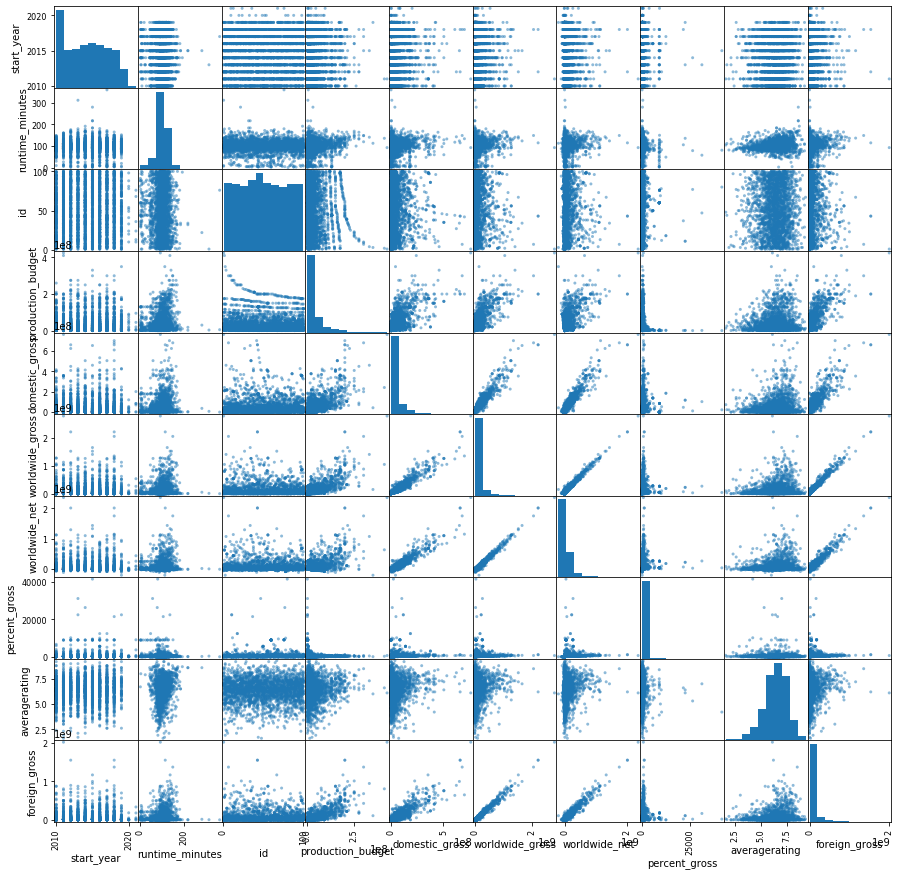

In [7]:
matrix = pd.plotting.scatter_matrix(noZero_gross, figsize=(15,15))

In [8]:
def label_chart(ax,title=None,xlabel=None,ylabel=None):
    """
    Sets title and labels on a given axes
    """
    if title:
        ax.set_title(title)
        
    if xlabel:
        ax.set_xlabel(xlabel)
    
    if ylabel:
        ax.set_ylabel(ylabel)
        
    return None

0.21184424171797178


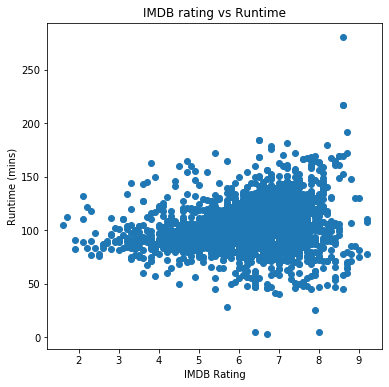

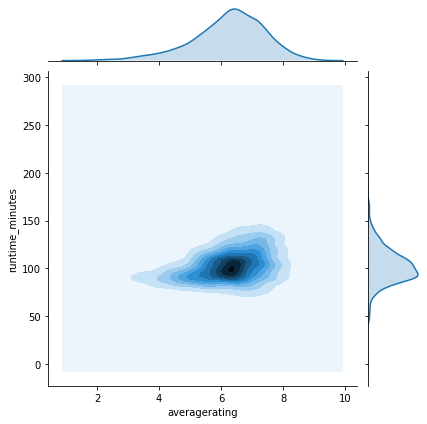

In [9]:
run_rate_corr = joined_table.runtime_minutes.corr(joined_table.averagerating)
print(run_rate_corr)
figure1, ax = plt.subplots(nrows=1,ncols=1,figsize=(6,6))
ax.scatter(joined_table.averagerating,joined_table.runtime_minutes);
label_chart(ax, title= 'IMDB rating vs Runtime',xlabel='IMDB Rating',ylabel='Runtime (mins)')

sns.jointplot(x=joined_table.averagerating,y=joined_table.runtime_minutes,kind="kde")

-0.09681818114271214

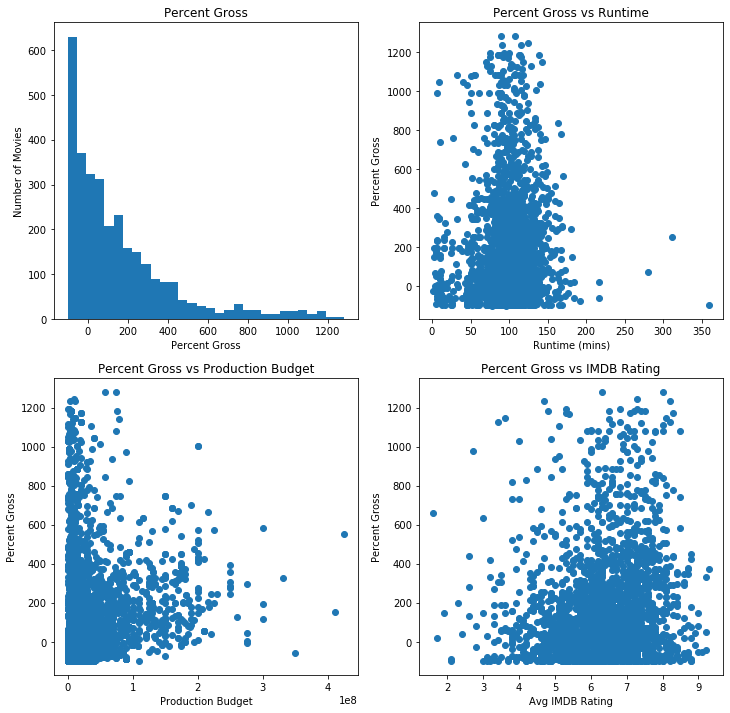

In [10]:
figure2, ax = plt.subplots(nrows=2,ncols=2,figsize=(12,12))

#Plots for percent gross
#Eliminate outliers via quantile
outlier_tolerance_pgross = noZero_gross.percent_gross.quantile(.95)

#histogram
ax[0][0].hist(noZero_gross.loc[noZero_gross.percent_gross <= outlier_tolerance_pgross].percent_gross, bins=30);
#ax[0][0].hist(noZero_gross.percent_gross, bins=50);
label_chart(ax[0][0],title='Percent Gross',xlabel='Percent Gross',ylabel='Number of Movies')

#scatter vs runtime
ax[0][1].scatter(noZero_gross.loc[noZero_gross.percent_gross <= outlier_tolerance_pgross].runtime_minutes,
                noZero_gross.loc[noZero_gross.percent_gross <= outlier_tolerance_pgross].percent_gross);
label_chart(ax[0][1],title='Percent Gross vs Runtime',xlabel='Runtime (mins)',ylabel='Percent Gross')

#scatter vs production. budget
ax[1][0].scatter(noZero_gross.loc[noZero_gross.percent_gross <= outlier_tolerance_pgross].production_budget,
                noZero_gross.loc[noZero_gross.percent_gross <= outlier_tolerance_pgross].percent_gross);
label_chart(ax[1][0],title='Percent Gross vs Production Budget',xlabel='Production Budget',ylabel='Percent Gross')

#scatter vs avg rating
ax[1][1].scatter(noZero_gross.loc[noZero_gross.percent_gross <= outlier_tolerance_pgross].averagerating,
                noZero_gross.loc[noZero_gross.percent_gross <= outlier_tolerance_pgross].percent_gross);
label_chart(ax[1][1],title='Percent Gross vs IMDB Rating',xlabel='Avg IMDB Rating',ylabel='Percent Gross')

noZero_gross.percent_gross.corr(noZero_gross.production_budget)

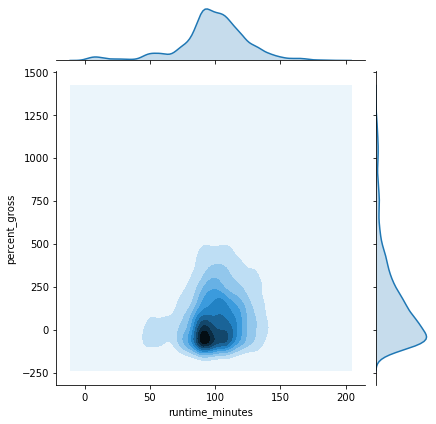

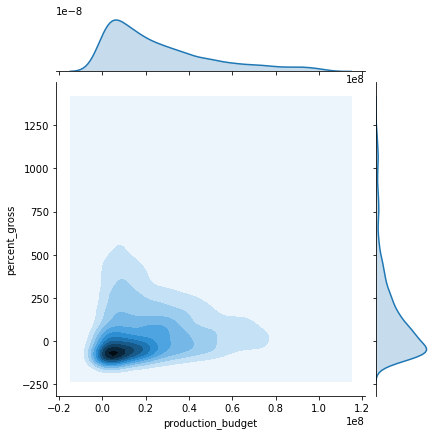

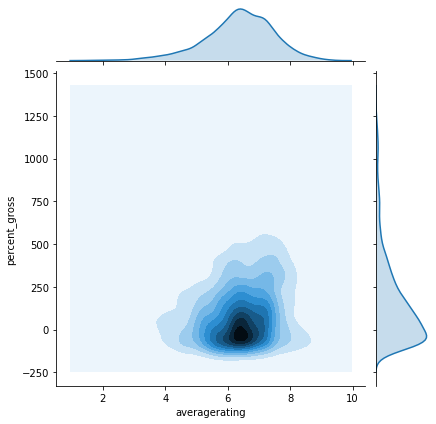

In [11]:
#Estimate Densities to find the typical movie
sns.jointplot(noZero_gross.loc[(noZero_gross.percent_gross <= outlier_tolerance_pgross)&(noZero_gross.runtime_minutes <=200)].runtime_minutes,
              noZero_gross.loc[(noZero_gross.percent_gross <= outlier_tolerance_pgross)&(noZero_gross.runtime_minutes <=200)].percent_gross, 
              kind="kde")

sns.jointplot(noZero_gross.loc[(noZero_gross.percent_gross <= outlier_tolerance_pgross)&(noZero_gross.production_budget <=1e8)].production_budget,
              noZero_gross.loc[(noZero_gross.percent_gross <= outlier_tolerance_pgross)&(noZero_gross.production_budget <=1e8)].percent_gross,
              kind="kde")

sns.jointplot(noZero_gross.loc[noZero_gross.percent_gross <= outlier_tolerance_pgross].averagerating,
                noZero_gross.loc[noZero_gross.percent_gross <= outlier_tolerance_pgross].percent_gross, kind="kde")

In [12]:
noZero_gross.production_budget.corr(noZero_gross.percent_gross)

-0.09681818114271215

In [13]:
noZero_gross.head()

,tconst,primary_title,start_year,runtime_minutes,genres,id,production_budget,domestic_gross,worldwide_gross,worldwide_net,percent_gross,averagerating,foreign_gross
33,tt0293429,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",10.0,20000000.0,70433227.0,122133227.0,102133227.0,510.666135,NaN,51700000.0
40,tt0326592,The Overnight,2010,88.0,NaN,21.0,200000.0,1109808.0,1165996.0,965996.0,482.998000,7.5,56188.0
48,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",17.0,25000000.0,720828.0,9313302.0,-15686698.0,-62.746792,6.1,8592474.0
54,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",37.0,91000000.0,58236838.0,187861183.0,96861183.0,106.440860,7.3,129624345.0
58,tt0365907,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",67.0,28000000.0,26017685.0,62108587.0,34108587.0,121.816382,6.5,36090902.0


490856498.9999995

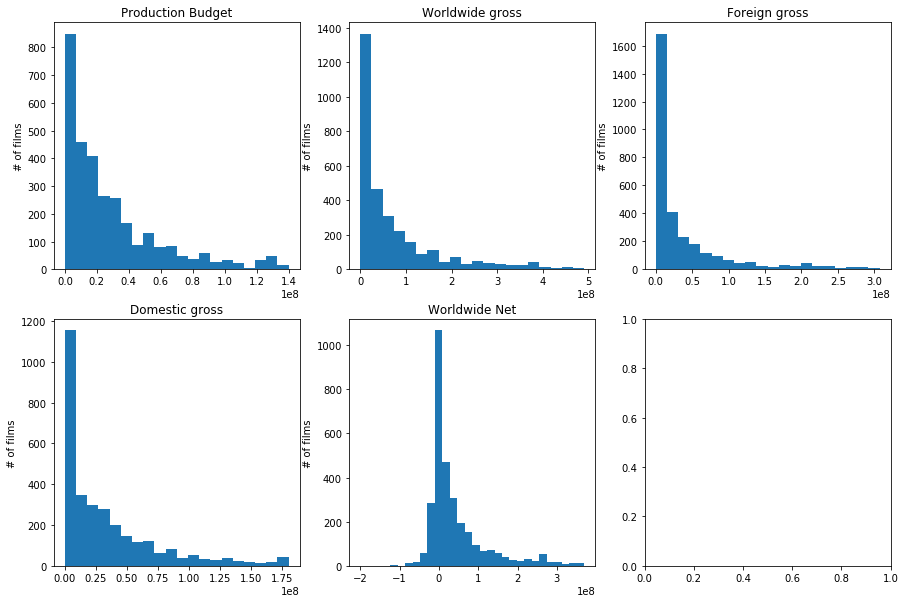

In [14]:
#Outsider Tolerances
outlier_tolerance_wgross = noZero_gross.worldwide_gross.quantile(.95)
outlier_tolerance_wnet = noZero_gross.worldwide_net.quantile(.95)
outlier_tolerance_fgross = noZero_gross.foreign_gross.quantile(.95)
outlier_tolerance_dgross = noZero_gross.domestic_gross.quantile(.95)
outlier_tolerance_budget = noZero_gross.production_budget.quantile(.95)

figure3, ax1 = plt.subplots(nrows=2,ncols=3,figsize=(15,10))
ax1[0][0].hist(noZero_gross.loc[noZero_gross.production_budget<outlier_tolerance_budget].production_budget,bins=20)
label_chart(ax1[0][0],title='Production Budget',ylabel='# of films')

ax1[0][1].hist(noZero_gross.loc[noZero_gross.worldwide_gross<outlier_tolerance_wgross].worldwide_gross,bins=20)
label_chart(ax1[0][1],title='Worldwide gross',ylabel='# of films')

ax1[1][0].hist(noZero_gross.loc[noZero_gross.domestic_gross<outlier_tolerance_dgross].domestic_gross,bins=20)
label_chart(ax1[1][0],title='Domestic gross',ylabel='# of films')

ax1[1][1].hist(noZero_gross.loc[noZero_gross.worldwide_net<outlier_tolerance_wnet].worldwide_net,bins=30)
label_chart(ax1[1][1],title='Worldwide Net',ylabel='# of films')

ax1[0][2].hist(noZero_gross.loc[noZero_gross.foreign_gross<outlier_tolerance_fgross].foreign_gross,bins=20)
label_chart(ax1[0][2],title='Foreign gross',ylabel='# of films')

noZero_gross.worldwide_gross.quantile(.95)

0.8724314843103015

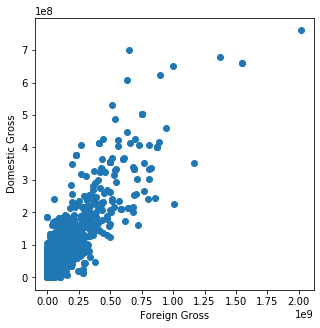

In [15]:
figure4, ax4 = plt.subplots(figsize=(5,5))
plt.scatter(noZero_gross.foreign_gross,noZero_gross.domestic_gross);
label_chart(ax4,xlabel='Foreign Gross',ylabel='Domestic Gross')
noZero_gross.foreign_gross.corr(noZero_gross.domestic_gross)#High Correlation between domestic and foreign grosses

0.09564805041760481

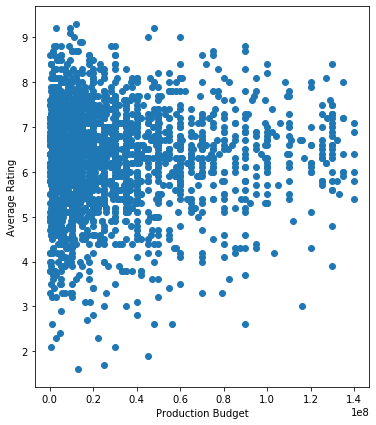

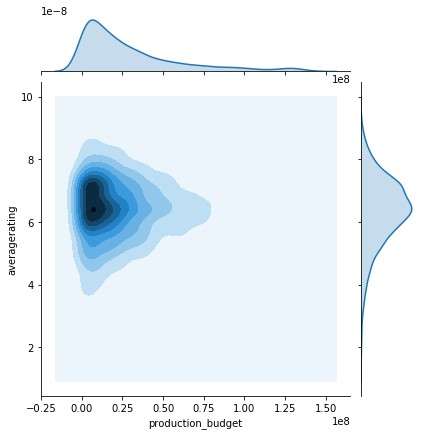

In [16]:
figure5, ax5 = plt.subplots(figsize=(6,7))
plt.scatter(noZero_gross.loc[noZero_gross.production_budget <=outlier_tolerance_budget].production_budget,
            noZero_gross.loc[noZero_gross.production_budget <=outlier_tolerance_budget].averagerating);
label_chart(ax5,xlabel='Production Budget',ylabel='Average Rating')

sns.jointplot(noZero_gross.loc[noZero_gross.production_budget <=outlier_tolerance_budget].production_budget,
              noZero_gross.loc[noZero_gross.production_budget <=outlier_tolerance_budget].averagerating, kind='kde')

noZero_gross.production_budget.corr(noZero_gross.averagerating) #little correlation so spend less money

-0.028201270927444063

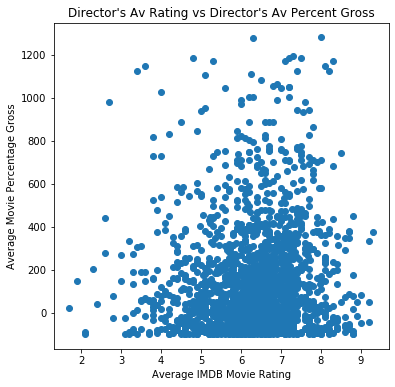

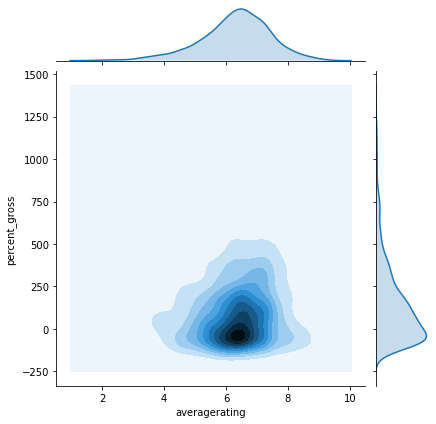

In [17]:
figure6, ax6 = plt.subplots(figsize=(6,6))

ax6.scatter(crew_grosses_df.loc[crew_grosses_df.percent_gross<outlier_tolerance_pgross].groupby('directors').averagerating.mean(),
            crew_grosses_df.loc[crew_grosses_df.percent_gross<outlier_tolerance_pgross].groupby('directors').percent_gross.mean());
label_chart(ax6,title="Director's Av Rating vs Director's Av Percent Gross", xlabel='Average IMDB Movie Rating', 
            ylabel='Average Movie Percentage Gross')

sns.jointplot(crew_grosses_df.loc[crew_grosses_df.percent_gross<outlier_tolerance_pgross].groupby('directors').averagerating.mean(),
            crew_grosses_df.loc[crew_grosses_df.percent_gross<outlier_tolerance_pgross].groupby('directors').percent_gross.mean(),kind='kde');

#very weak negative correlation --> could imply some relation to a good director being expensive
crew_grosses_df.groupby('directors').percent_gross.mean().corr(crew_grosses_df.groupby('directors').averagerating.mean())

In [18]:
crew_grosses_df.percent_gross.quantile(.95)

1281.9323159403439

-0.013612204941014113

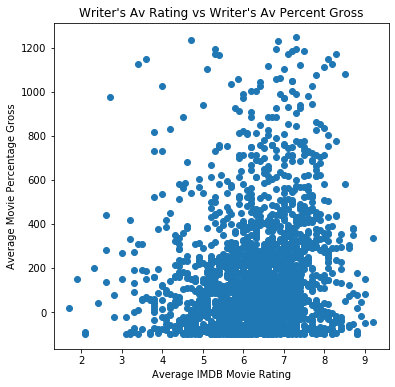

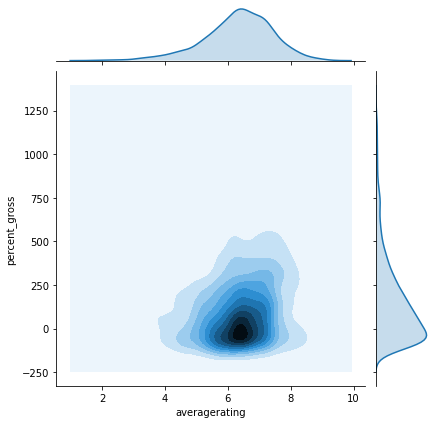

In [19]:
figure7, ax7 = plt.subplots(figsize=(6,6))

plt.scatter(crew_grosses_df.loc[crew_grosses_df.percent_gross<outlier_tolerance_pgross].groupby('writers').averagerating.mean(),
            crew_grosses_df.loc[crew_grosses_df.percent_gross<outlier_tolerance_pgross].groupby('writers').percent_gross.mean());
label_chart(ax7,title="Writer's Av Rating vs Writer's Av Percent Gross", xlabel='Average IMDB Movie Rating', 
            ylabel='Average Movie Percentage Gross')
sns.jointplot(crew_grosses_df.loc[crew_grosses_df.percent_gross<outlier_tolerance_pgross].groupby('writers').averagerating.mean(),
            crew_grosses_df.loc[crew_grosses_df.percent_gross<outlier_tolerance_pgross].groupby('writers').percent_gross.mean(),kind='kde');
#sns.joinplot(x,y,kind='kde')
#very weak negative correlation --> could imply small relation to a good scripts being expensive
crew_grosses_df.groupby('writers').percent_gross.mean().corr(crew_grosses_df.groupby('writers').averagerating.mean())


In [20]:
actors_df = principles_grosses_df.loc[(principles_grosses_df.percent_gross<outlier_tolerance_pgross) &
            ((principles_grosses_df.category == 'actor') | (principles_grosses_df.category == 'actress'))]

0.05437358465109647

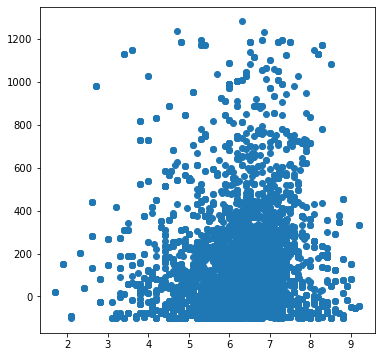

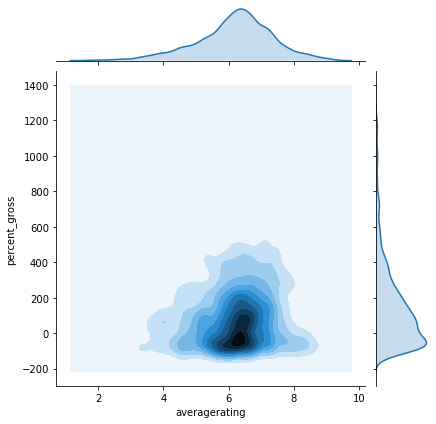

In [38]:
principles_grosses_df.groupby('nconst').percent_gross.mean()

figure8, ax8 = plt.subplots(figsize=(6,6))

plt.scatter(actors_df.loc[principles_grosses_df.percent_gross<outlier_tolerance_pgross].groupby('nconst').averagerating.mean(),
            actors_df.loc[principles_grosses_df.percent_gross<outlier_tolerance_pgross].groupby('nconst').percent_gross.mean());
label_chart(ax7,title="Actor's Movie Av Rating vs Acors's Movie Av Percent Gross", xlabel='Average IMDB Movie Rating', 
            ylabel='Average Movie Percentage Gross')

sns.jointplot(actors_df.loc[principles_grosses_df.percent_gross<outlier_tolerance_pgross].groupby('nconst').averagerating.mean(),
            actors_df.loc[principles_grosses_df.percent_gross<outlier_tolerance_pgross].groupby('nconst').percent_gross.mean(),kind='kde');



#very weak negative correlation --> could imply small relation to a big name actors being expensive
actors_df.loc[principles_grosses_df.category == 'actor'].groupby('nconst').percent_gross.mean().corr(principles_grosses_df.loc[principles_grosses_df.category == 'actor'].groupby('nconst').averagerating.mean())


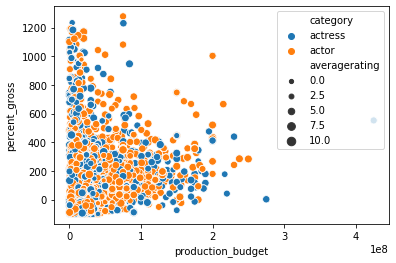

In [26]:
key_people_df = principles_grosses_df.loc[(principles_grosses_df.percent_gross<outlier_tolerance_pgross) &
            ((principles_grosses_df.category == 'actor') | (principles_grosses_df.category == 'actress') | 
             (principles_grosses_df.category == 'writer') | (principles_grosses_df.category == 'director')|
            (principles_grosses_df.category == 'producer'))]



sns.scatterplot(data=actors_df.groupby(['nconst','category']).mean().reset_index(level='category'),
                x='production_budget',y='percent_gross',hue='category',size='averagerating')


In [34]:
genres_table=noZero_gross.dropna(subset=['genres'])
genres_table.genres = [i.split(',') for i in genres_table.genres]

/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [37]:
noZero_gross.loc[noZero_gross.start_year>2019].count()

tconst               18
primary_title        18
start_year           18
runtime_minutes       0
genres               18
id                   18
production_budget    18
domestic_gross       18
worldwide_gross      18
worldwide_net        18
percent_gross        18
averagerating         0
foreign_gross        18
dtype: int64

KDE Actor Average Movie Rating vs Percent Gross | KDE WritersAverage Movie Rating vs Percent Gross |KDE Directors Average Movie Rating vs Percent Gross
:-: | :-: | :-:
![KDE_actors](./images/kde_actors.png) |![KDE_writers](./images/kde_writers.png) |![KDE_directors](./images/kde_directors.png)|